In [1]:
#引入需要用到的库
from keras.optimizers import *
from keras.models import *
from keras.layers import *
from keras.applications import *
from keras.preprocessing.image import *
from keras.utils import np_utils
import os,sys
import numpy as np
import pandas as pd
import cv2,time,glob,math
import matplotlib.pyplot as plt # plt 用于显示图片
from tqdm import tqdm #进度条
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras import backend as K

Using TensorFlow backend.


## 在ipython中展示模型结构

### - InceptionV3

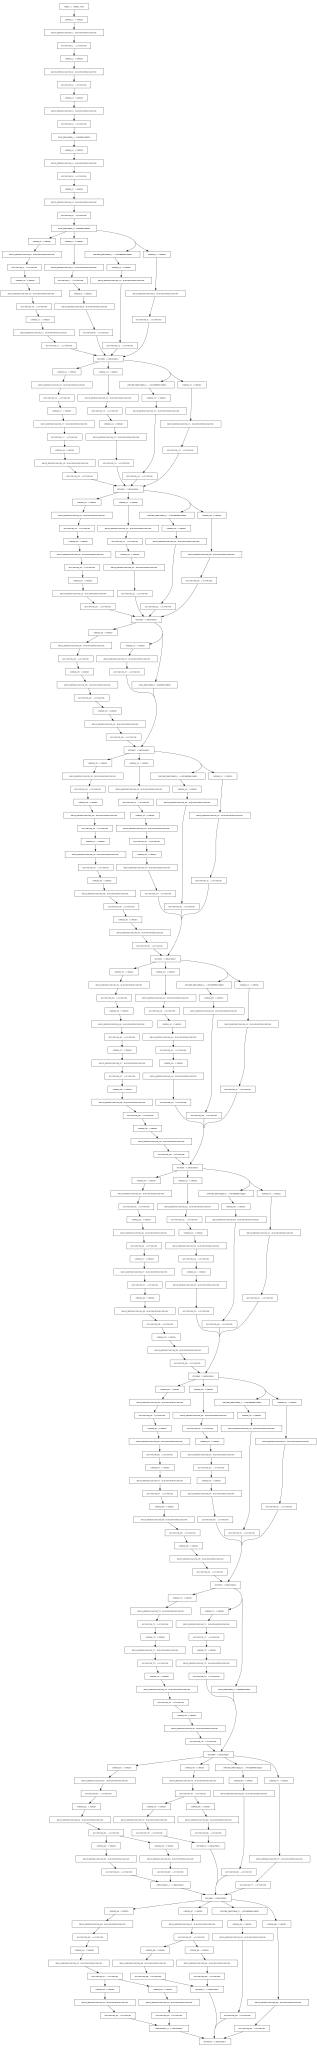

In [3]:
K.clear_session()
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(300, 300, 3)) 
SVG(model_to_dot(base_model).create(prog='dot', format='svg'))

In [6]:
z = zip([x.name for x in base_model.layers], range(len(base_model.layers)))
for k, v in z:
    print("{} - {}".format(k,v))

input_1 - 0
conv2d_1 - 1
batch_normalization_1 - 2
activation_1 - 3
conv2d_2 - 4
batch_normalization_2 - 5
activation_2 - 6
conv2d_3 - 7
batch_normalization_3 - 8
activation_3 - 9
max_pooling2d_1 - 10
conv2d_4 - 11
batch_normalization_4 - 12
activation_4 - 13
conv2d_5 - 14
batch_normalization_5 - 15
activation_5 - 16
max_pooling2d_2 - 17
conv2d_9 - 18
batch_normalization_9 - 19
activation_9 - 20
conv2d_7 - 21
conv2d_10 - 22
batch_normalization_7 - 23
batch_normalization_10 - 24
activation_7 - 25
activation_10 - 26
average_pooling2d_1 - 27
conv2d_6 - 28
conv2d_8 - 29
conv2d_11 - 30
conv2d_12 - 31
batch_normalization_6 - 32
batch_normalization_8 - 33
batch_normalization_11 - 34
batch_normalization_12 - 35
activation_6 - 36
activation_8 - 37
activation_11 - 38
activation_12 - 39
mixed0 - 40
conv2d_16 - 41
batch_normalization_16 - 42
activation_16 - 43
conv2d_14 - 44
conv2d_17 - 45
batch_normalization_14 - 46
batch_normalization_17 - 47
activation_14 - 48
activation_17 - 49
average_pooling

## - Xception

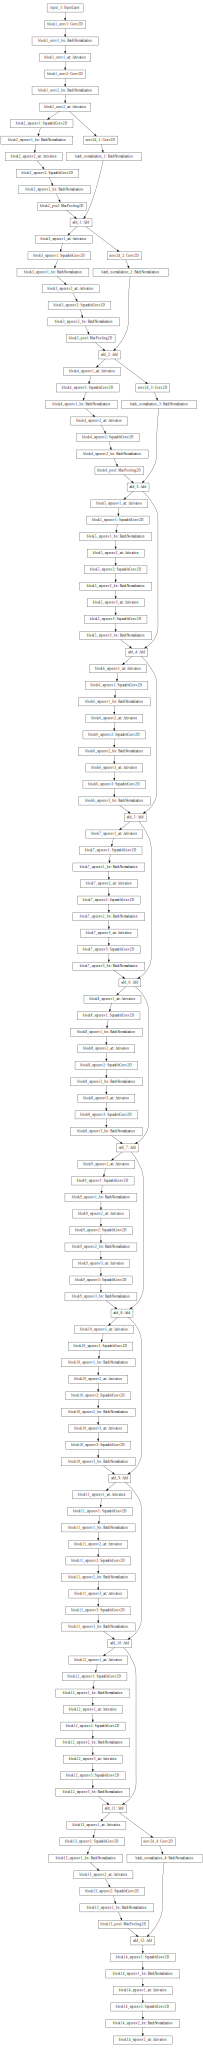

In [8]:
K.clear_session()
base_model = Xception(weights='imagenet', include_top=False, input_shape=(300, 300, 3)) 
SVG(model_to_dot(base_model).create(prog='dot', format='svg'))

In [9]:
z = zip([x.name for x in base_model.layers], range(len(base_model.layers)))
for k, v in z:
    print("{} - {}".format(k,v))

input_1 - 0
block1_conv1 - 1
block1_conv1_bn - 2
block1_conv1_act - 3
block1_conv2 - 4
block1_conv2_bn - 5
block1_conv2_act - 6
block2_sepconv1 - 7
block2_sepconv1_bn - 8
block2_sepconv2_act - 9
block2_sepconv2 - 10
block2_sepconv2_bn - 11
conv2d_1 - 12
block2_pool - 13
batch_normalization_1 - 14
add_1 - 15
block3_sepconv1_act - 16
block3_sepconv1 - 17
block3_sepconv1_bn - 18
block3_sepconv2_act - 19
block3_sepconv2 - 20
block3_sepconv2_bn - 21
conv2d_2 - 22
block3_pool - 23
batch_normalization_2 - 24
add_2 - 25
block4_sepconv1_act - 26
block4_sepconv1 - 27
block4_sepconv1_bn - 28
block4_sepconv2_act - 29
block4_sepconv2 - 30
block4_sepconv2_bn - 31
conv2d_3 - 32
block4_pool - 33
batch_normalization_3 - 34
add_3 - 35
block5_sepconv1_act - 36
block5_sepconv1 - 37
block5_sepconv1_bn - 38
block5_sepconv2_act - 39
block5_sepconv2 - 40
block5_sepconv2_bn - 41
block5_sepconv3_act - 42
block5_sepconv3 - 43
block5_sepconv3_bn - 44
add_4 - 45
block6_sepconv1_act - 46
block6_sepconv1 - 47
block6

### - ResNet50

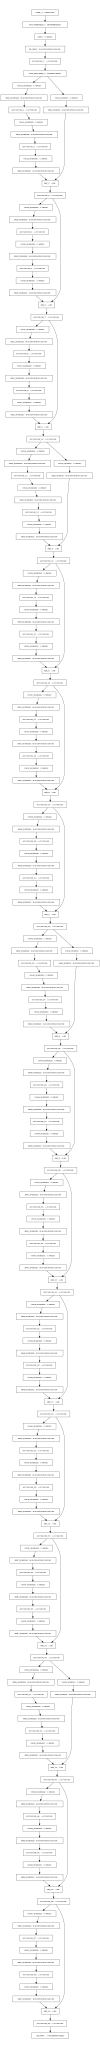

In [11]:
K.clear_session()
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(300, 300, 3)) 
SVG(model_to_dot(base_model).create(prog='dot', format='svg'))

In [12]:
z = zip([x.name for x in base_model.layers], range(len(base_model.layers)))
for k, v in z:
    print("{} - {}".format(k,v))

input_1 - 0
zero_padding2d_1 - 1
conv1 - 2
bn_conv1 - 3
activation_1 - 4
max_pooling2d_1 - 5
res2a_branch2a - 6
bn2a_branch2a - 7
activation_2 - 8
res2a_branch2b - 9
bn2a_branch2b - 10
activation_3 - 11
res2a_branch2c - 12
res2a_branch1 - 13
bn2a_branch2c - 14
bn2a_branch1 - 15
add_1 - 16
activation_4 - 17
res2b_branch2a - 18
bn2b_branch2a - 19
activation_5 - 20
res2b_branch2b - 21
bn2b_branch2b - 22
activation_6 - 23
res2b_branch2c - 24
bn2b_branch2c - 25
add_2 - 26
activation_7 - 27
res2c_branch2a - 28
bn2c_branch2a - 29
activation_8 - 30
res2c_branch2b - 31
bn2c_branch2b - 32
activation_9 - 33
res2c_branch2c - 34
bn2c_branch2c - 35
add_3 - 36
activation_10 - 37
res3a_branch2a - 38
bn3a_branch2a - 39
activation_11 - 40
res3a_branch2b - 41
bn3a_branch2b - 42
activation_12 - 43
res3a_branch2c - 44
res3a_branch1 - 45
bn3a_branch2c - 46
bn3a_branch1 - 47
add_4 - 48
activation_13 - 49
res3b_branch2a - 50
bn3b_branch2a - 51
activation_14 - 52
res3b_branch2b - 53
bn3b_branch2b - 54
activati

## CAM 可视化

http://cnnlocalization.csail.mit.edu/

![](http://cnnlocalization.csail.mit.edu/framework.jpg)

$cam = (P-0.5)*w*output$

In [ ]:
labels = [" normal driving","texting - right","talking on the phone - right","texting - left",
          "talking on the phone - left","operating the radio",
          "drinking"," reaching behind","hair and makeup","talking to passenger"]

In [ ]:
import matplotlib.pyplot as plt
import random
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

def show_heatmap_image(model_show, weights_show):
    test_dir = 'test2/test'
    image_files = glob.glob(os.path.join(test_dir,"*"))
    
    plt.figure(figsize=(12, 14))
    for i in tqdm(range(16)):
        plt.subplot(4, 4, i+1)
        img = cv2.imread(image_files[np.random.randint(len(image_files))])
        img = cv2.resize(img, (img_width, img_height))
        x = img.copy()
        #x.astype(np.float32)
        out, predictions = model_show.predict(np.expand_dims(x, axis=0))
        predictions = predictions[0]
        out = out[0]
        
        pred_class = np.argmax(predictions)
        prob = predictions[pred_class]

        plt.title('c%d |%s| %.2f%%' % (pred_class , labels[pred_class], prob*100))
    
        cam = (prob - 0.5) * np.matmul(out, weights_show)
        cam = cam[:,:,pred_class]
        cam -= cam.min()
        cam /= cam.max()
        cam -= 0.2
        cam /= 0.8

        cam = cv2.resize(cam, (img_width, img_height))
        heatmap = cv2.applyColorMap(np.uint8(255*cam), cv2.COLORMAP_JET)
        heatmap[np.where(cam <= 0.2)] = 0

        out = cv2.addWeighted(img, 0.8, heatmap, 0.4, 0)

        plt.axis('off')
        plt.imshow(out[:,:,::-1])
print("done")

In [ ]:
# load previously trained model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width,img_height, 3)) 
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.25)(x) 
x = Dense(nb_categories, activation='softmax')(x) 

model = Model(inputs=base_model.input, outputs=x)
model.load_weights('models/')

In [ ]:
# set weights parameters based on model layer structure
weights = model.layers[177].get_weights()[0]
layer_output = model.layers[173].output
model2 = Model(model.input, [layer_output, model.output])
print("layer_output {0}".format(layer_output))
print("weights shape {0}".format(weights.shape))
show_heatmap_image(model2, weights)